## 붖꽃 품종 예측하기
- datasets : 붖꽃 데이터 세트(load_iris) 가져오기 위한 라이브러리
- tree : 학습 모듈 (DecisionTree : 의사 결정 트리)
- train_test_split : 데이터 분리를 위한 함수
- pandas : 데이터 핸들링을 위한 라이브러리
- accuracy_score : 정확도 측정을 위한 함수

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
# 붖꽃 데이터 세트 로딩 
iris = load_iris()

In [3]:
# 붖꽃 데이터 세트중 피처만으로 되어있는 데이터를 가져옴
iris_data = iris.data

In [4]:
# 데이터 확인
iris_label = iris.target
print('iris target값 : {}'.format(iris_label))
print('iris target명 : {}'.format(iris.target_names))

iris target값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명 : ['setosa' 'versicolor' 'virginica']


In [5]:
# 데이터 세트를 dataframe 으로 변경
# label 은 품종으로 0, 1, 2 로 구성되어 있음
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# 데이터 분리 
# test_size=0.2 : 테스트 20%, 학습데이터 80% (default : 0.25)
# random_state=11 : 랜덤한 세트로 분리하기 위한 시드값 (시드값을 지정해주지 않으면 실행시마다 다른 세트로 나올수 있으며 11은 큰 의미 없으므로 다른 숫자를 넣어도 됨) 
# shuffle : 데이터를 분리하기전 미리 섞을 것인지 : (default: true)
x_train, x_test , y_train , y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11, shuffle=True)

In [7]:
# 트리 생성
dt_class = DecisionTreeClassifier(random_state=11)

In [8]:
# 학습 수행
dt_class.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [9]:
# 학습 완료된 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_class.predict(x_test)

In [10]:
# 정확도 출력 : 93%
print('정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

정확도 : 0.9333


## 교차검증
### 1) K 폴드 교차 검증

In [11]:
from sklearn.model_selection import KFold
import numpy as np

In [12]:
iris = load_iris()
features = iris.data # 입력 데이터
label = iris.target # 정답 데이터
dt_class = DecisionTreeClassifier(random_state=156)

In [13]:
# K 폴드 선언
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붖꽃 데이터 세트 크기 : ', features.shape[0])

붖꽃 데이터 세트 크기 :  150


In [14]:
n_iter = 0
# Kfold 의 split 함수 호출시 index 반환
for train_index, test_index in kfold.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_class.fit(x_train, y_train)
    pred = dt_class.predict(x_test)
    n_iter+=1
    #정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print("[{0}] 번째 교차 검증".format(n_iter))
    print('- 교차 검증 정확도 : {0}, 학습 데이터 크기 : {1}, 검증 데이터 크기 : {2}'.format(accuracy, train_size, test_size))
    print('- 검증 인덱스 : {0}'.format(test_index))
    print("----------------------------------------------------------------------")
    cv_accuracy.append(accuracy)

[1] 번째 교차 검증
- 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
- 검증 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
----------------------------------------------------------------------
[2] 번째 교차 검증
- 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
- 검증 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
----------------------------------------------------------------------
[3] 번째 교차 검증
- 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
- 검증 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
----------------------------------------------------------------------
[4] 번째 교차 검증
- 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
- 검증 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
----------------------------------------------------------------------
[5] 번

In [15]:
# 정확도 : K개 검증 평균 => 90%
print("검증 정확도 : {}".format(np.mean(cv_accuracy)))

검증 정확도 : 0.9


### 2) stratified K 폴드
- 데이터가 편향되어 분배되는 것을 방지하기 위한 방법

In [16]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [17]:
iris = load_iris()
features = iris.data # 입력 데이터
label = iris.target # 정답 데이터
dt_class = DecisionTreeClassifier(random_state=156)

In [18]:
# K 폴드 선언
skfold = StratifiedKFold(n_splits=5)
cv_accuracy = []
print('붖꽃 데이터 세트 크기 : ', features.shape[0])

붖꽃 데이터 세트 크기 :  150


In [19]:
n_iter = 0
# Kfold 의 split 함수 호출시 index 반환
for train_index, test_index in skfold.split(features, label):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_class.fit(x_train, y_train)
    pred = dt_class.predict(x_test)
    n_iter+=1
    #정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print("[{0}] 번째 교차 검증".format(n_iter))
    print('- 교차 검증 정확도 : {0}, 학습 데이터 크기 : {1}, 검증 데이터 크기 : {2}'.format(accuracy, train_size, test_size))
    print('- 검증 인덱스 : {0}'.format(test_index))
    print("----------------------------------------------------------------------")
    cv_accuracy.append(accuracy)

[1] 번째 교차 검증
- 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
- 검증 인덱스 : [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
----------------------------------------------------------------------
[2] 번째 교차 검증
- 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
- 검증 인덱스 : [ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
----------------------------------------------------------------------
[3] 번째 교차 검증
- 교차 검증 정확도 : 0.9, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
- 검증 인덱스 : [ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
----------------------------------------------------------------------
[4] 번째 교차 검증
- 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
- 검증 인덱스 : [ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136

In [20]:
# 정확도 : K개 검증 평균 => 96%
print("검증 정확도 : {}".format(np.mean(cv_accuracy)))

검증 정확도 : 0.9600200000000001


### 3) K 폴드 vs stratified K 폴드
- 분류에서는 stratified K 폴드를 주로 사용
- 회귀에서는 정답 데이터가 연속적인 값이기에 stratified K 폴드를 사용할 수 없다. (input에 정답 데이터를 넣기에)

In [21]:
# K 폴드 방식
kfold = KFold(n_splits=3)

n_iter = 0
for train_index, test_index in kfold.split(features):
    y_train, y_test = label[train_index], label[test_index]
    n_iter+=1
    print("[{0}] 번째 교차 검증".format(n_iter))
    print("- 학습 데이터\n{0}".format(pd.DataFrame(y_train).value_counts()))
    print("- 검증 데이터\n{0}".format(pd.DataFrame(y_test).value_counts()))
    print("------------------")

[1] 번째 교차 검증
- 학습 데이터
2    50
1    50
dtype: int64
- 검증 데이터
0    50
dtype: int64
------------------
[2] 번째 교차 검증
- 학습 데이터
2    50
0    50
dtype: int64
- 검증 데이터
1    50
dtype: int64
------------------
[3] 번째 교차 검증
- 학습 데이터
1    50
0    50
dtype: int64
- 검증 데이터
2    50
dtype: int64
------------------


In [22]:
# stratified K 폴드 방식
skfold = StratifiedKFold(n_splits=3)

n_iter = 0
for train_index, test_index in skfold.split(features, label):
    y_train, y_test = label[train_index], label[test_index]
    n_iter+=1
    print("[{0}] 번째 교차 검증".format(n_iter))
    print("- 학습 데이터\n{0}".format(pd.DataFrame(y_train).value_counts()))
    print("- 검증 데이터\n{0}".format(pd.DataFrame(y_test).value_counts()))
    print("------------------")

[1] 번째 교차 검증
- 학습 데이터
2    34
1    33
0    33
dtype: int64
- 검증 데이터
1    17
0    17
2    16
dtype: int64
------------------
[2] 번째 교차 검증
- 학습 데이터
1    34
2    33
0    33
dtype: int64
- 검증 데이터
2    17
0    17
1    16
dtype: int64
------------------
[3] 번째 교차 검증
- 학습 데이터
0    34
2    33
1    33
dtype: int64
- 검증 데이터
2    17
1    17
0    16
dtype: int64
------------------


### 4) 교차 검증을 간편하게
- cross_val_score
- 교차 검증을 위한 데이터를 나누고 , 학습을 시켜주고 , 정확도 리턴을 한번에 해준다.

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
iris_data = load_iris()
dt_class = DecisionTreeClassifier(random_state=156)

In [25]:
data = iris_data.data
label = iris_data.target

In [26]:
# 1 : 학습 모델
# 2 : 입력 데이터
# 3 : 출력 데이터
# 4(scoring) : 성능지표 (accuracy : 정확도)
# 5(cv) : 교차 검증 수
scores = cross_val_score(dt_class, data, label, scoring='accuracy', cv=3)

In [27]:
print('교차 검증별 정확도 : {}'.format(np.round(scores, 4)))
print('평균 검증 정확도 : {}'.format(np.round(np.mean(scores),4)))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


### 5) 교차검증 + 하이퍼 파라미터 튜닝
- GridSearchCV
- 입력 파라미터에 데이터가 없기에 데이터를 따로 넣어줘야함.

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
iris_data = load_iris()
x_train, x_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)

In [30]:
dt_class = DecisionTreeClassifier()

In [31]:
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [32]:
# 1: 모델 명
# 2(param_grid) : 하이퍼 파라미터 
# 3(cv) : 교차 검증 수
# 4(refit) : True 면 좋은 하이퍼 파라미터로 한번더 학습시킴 (default: True) 
grid_dtree = GridSearchCV(dt_class, param_grid=parameters, cv=3, refit=True)

In [33]:
grid_dtree.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [34]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000681,5.472871e-05,0.000356,5.637859e-05,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.000425,9.197589e-06,0.000258,2.592326e-06,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.000442,1.959099e-05,0.000266,1.382965e-05,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.000451,1.020909e-05,0.000262,5.061367e-06,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.000430,1.700793e-06,0.000254,4.495664e-07,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.000430,7.867412e-07,0.000255,8.485379e-07,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [35]:
# 최적 파라미터 
print('최적 파라미터 : {}'.format(grid_dtree.best_params_))
print('학습 데이터로 교차 검증 3개 폴드의 최고 평균 정확도 : {}'.format(grid_dtree.best_score_))

최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
학습 데이터로 교차 검증 3개 폴드의 최고 평균 정확도 : 0.975


In [36]:
# 최적 파라미터로 한번더 학습 됐는지 확인
pred = grid_dtree.predict(x_test)
print('테스트 데이터로 예측 정확도 : {}'.format(accuracy_score(y_test, pred)))

테스트 데이터로 예측 정확도 : 0.9666666666666667


In [37]:
# 최적 파라미터로 학습된 모델 반환
estimator = grid_dtree.best_estimator_

# 따로 학습할 필요가 없어 예측만 수행
pred = estimator.predict(x_test)
print('테스트 데이터로 예측 정확도 : {}'.format(accuracy_score(y_test, pred)))

테스트 데이터로 예측 정확도 : 0.9666666666666667


## 데이터 전처리

### 1) 레이블 인코딩

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
items = ['TV', '냉장고', '전자레인지']

In [40]:
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 값 : {}'.format(labels))
print('인코딩 클래스 : {}'.format(encoder.classes_))
print('인코딩 값을 거꾸로 뒤집어서 디코드 : {}'.format(encoder.inverse_transform(list(reversed(labels)))))

인코딩 값 : [0 1 2]
인코딩 클래스 : ['TV' '냉장고' '전자레인지']
인코딩 값을 거꾸로 뒤집어서 디코드 : ['전자레인지' '냉장고' 'TV']


### 2) 원-핫 인코딩
- sklearn
- pandas

#### 1.  sklearn

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
items = ['TV', '냉장고', '전자레인지','TV']

In [43]:
# 라벨 인코딩으로 숫자로 변환 후 1차원 > 2차원 변경 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('데이터 차원\n{0} \n라벨 인코딩 데이터\n{1}'.format(labels.shape,labels))
labels = labels.reshape(-1,1)
print('------------')
print('데이터 차원\n{0} \n2차원으로 변형된 데이터\n{1}'.format(labels.shape,labels))

데이터 차원
(4,) 
라벨 인코딩 데이터
[0 1 2 0]
------------
데이터 차원
(4, 1) 
2차원으로 변형된 데이터
[[0]
 [1]
 [2]
 [0]]


In [44]:
# 원-핫 인코딩으로 변환
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터\n{0}'.format(oh_labels.toarray()))
print('원-핫 인코딩 데이터 차원\n{0}'.format(oh_labels.shape))

원-핫 인코딩 데이터
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
원-핫 인코딩 데이터 차원
(4, 3)


#### 2.  pandas

In [45]:
import pandas as pd

In [46]:
df = pd.DataFrame({'item':items})
df

,item
0,TV
1,냉장고
2,전자레인지
3,TV


In [47]:
# 겟 더미스 사용시 쉽게 one-hot encoding 이 가능하다.
pd.get_dummies(df)

,item_TV,item_냉장고,item_전자레인지
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


## 피처 스케일링
- StandardScaler
- MinMaxScaler

### 현재 데이터 분포

In [48]:
iris = load_iris()
input_data = iris.data
input_df = pd.DataFrame(data=input_data, columns=iris.feature_names)
input_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
print('평균값\n{}'.format(input_df.mean()))
print('분산값\n{}'.format(input_df.var()))

평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


### Standard Scaler
- 표준화 : 평균은 0에 가까운값, 분산은 1에 가까운 가우시안 정규 분포를 가진 값으로 변경

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaler.fit(input_df)
iris_scaled = scaler.transform(input_df) # numpy 로 리턴
type(iris_scaled)

numpy.ndarray

In [52]:
# dataframe 으로 변경
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [53]:
print('평균값\n{}'.format(iris_scaled_df.mean()))
print('분산값\n{}'.format(iris_scaled_df.var()))

평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
- 데이터를 0과 1사이 값으로 변환 (음수가 있다면 -1 ~ 1값으로 변경)

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
scaler.fit(input_df)
iris_scaled = scaler.transform(input_df)# numpy 로 리턴
type(iris_scaled)

numpy.ndarray

In [56]:
# dataframe 으로 변경
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [57]:
print('최소값\n{}'.format(iris_scaled_df.min()))
print('최대값\n{}'.format(iris_scaled_df.max()))

최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 스케일링 유의 사항
- train data를 fit, transform  진행 후, test data fit, transform 진행 하면 각각 스케일링 기준이 달라져서 정확한 예측이 불가능
- train data 를 fit, transform 진행 후, test data transform 진행 해야함

### 잘못된 스케일링
- train , test 스케일링된 값이 다름.

In [58]:
import numpy as np
# fit, transform 은 2차원 이상 데이터만 가능하여 2차원으로 변환후 진행
# reshape(-1,1) : -1은 행수 지정하지 않음, 1열 > 보통 2차원으로 변경시 사용
train_arr = np.arange(0,11).reshape(-1,1)
test_arr = np.arange(0,6).reshape(-1,1)

In [59]:
scaler = MinMaxScaler()
scaler.fit(train_arr)
train_scaled = scaler.transform(train_arr)

# reshape(-1) : 1차원으로 변경할때 쓰는 방법
print('원본 train 데이터 : {}'.format(train_arr.reshape(-1)))
print('변환 된 train 데이터 : {}'.format(train_scaled.reshape(-1)))

원본 train 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
변환 된 train 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [60]:
scaler = MinMaxScaler()
scaler.fit(test_arr)
test_scaled = scaler.transform(test_arr)

# reshape(-1) : 1차원으로 변경할때 쓰는 방법
print('원본 test 데이터 : {}'.format(test_arr.reshape(-1)))
print('변환 된 test 데이터 : {}'.format(test_scaled.reshape(-1)))

원본 test 데이터 : [0 1 2 3 4 5]
변환 된 test 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


### 올바른 스케일링 예시

In [61]:
train_arr = np.arange(0,11).reshape(-1,1)
test_arr = np.arange(0,6).reshape(-1,1)

In [62]:
scaler = MinMaxScaler()
scaler.fit(train_arr)
train_scaled = scaler.transform(train_arr)

# reshape(-1) : 1차원으로 변경할때 쓰는 방법
print('원본 train 데이터 : {}'.format(train_arr.reshape(-1)))
print('변환 된 train 데이터 : {}'.format(train_scaled.reshape(-1)))

원본 train 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
변환 된 train 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [63]:
test_scaled = scaler.transform(test_arr)

# reshape(-1) : 1차원으로 변경할때 쓰는 방법
print('원본 test 데이터 : {}'.format(test_arr.reshape(-1)))
print('변환 된 test 데이터 : {}'.format(test_scaled.reshape(-1)))

원본 test 데이터 : [0 1 2 3 4 5]
변환 된 test 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


### 타이타닉 생존자 예측
- https://www.kaggle.com/c/titanic/data
- 'PassengerId' : 탑승자 일련번호
- 'Survived' : 생존 여부 (0: 사망, 1: 생존)
- 'Pclass' : 티켓의 선실 등급 (1 : 1등석 , 2 : 2등석, 3: 3등석)
- 'Name' : 탑승객 이름
- 'Sex' : 탑승객 성별
- 'Age' : 탑승객 나이
- 'SibSp' : 같이 탑승한 형재자매 또는 배우자 인원수
- 'Parch' : 같이 탑승한 부모님 또는 어린이 인원수
- 'Ticket' : 티켓 번호
- 'Fare' : 요금
- 'Cabin' : 선실 번호
- 'Embarked' : 중간 정착 항구 (C,Q,S)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 데이터 시각화

In [68]:
# 성별에 따른 생존자 수 
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

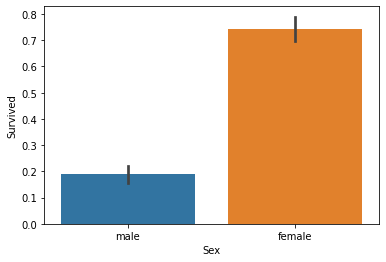

In [69]:
# 성별에 따른 생존자 수 
sns.barplot(x='Sex', y='Survived', data=data)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

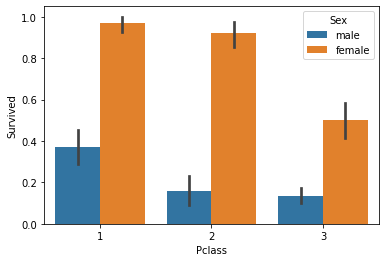

In [70]:
# 선실 등급, 성별에 따른 생존률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)

In [71]:
# 입력 나이에 따라 구분 값을 반환하는 함수
def get_age_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <=5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <=18: cat = 'Teenager'
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat

In [72]:
# X 축 값을 순서대로 표시
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

In [73]:
# 나이 값을 get_category 함수의 리턴 값으로 하는 칼럼 생성
# - apply : 행또는 열 전체의 셀에 원하는 연산 수행
data['age_category'] = data['Age'].apply(lambda x : get_age_category(x))

<AxesSubplot:xlabel='age_category', ylabel='Survived'>

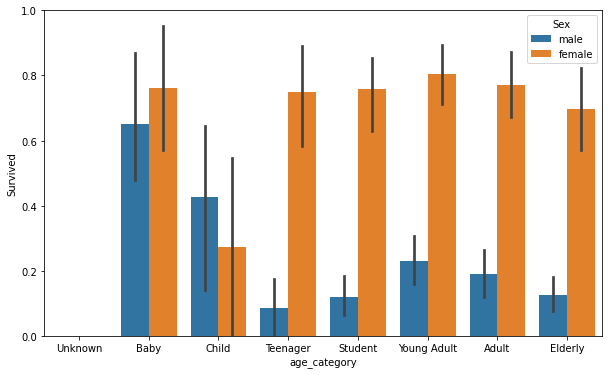

In [74]:
# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))
sns.barplot(x='age_category', y='Survived', hue='Sex', data=data, order=group_names)

In [75]:
data.drop(['age_category'],axis=1, inplace=True)

#### # Null 이 있는 Age, Cabin, Embarked 데이터 전처리
- fillna : Null 인 값 치환 (inplace=True 면, 객체 생성하여 반환하지 않고 기존 객체 수정)

In [76]:
# Null 처리 함수 
def fillna(data):
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Cabin'].fillna('N', inplace=True)
    data['Embarked'].fillna('N', inplace=True)
    return data

In [77]:
fillna(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### # 필요 없는 데이터 제거
#### drop : 데이터 제거 ( axis=1 열 , axis=0 행 || inplace=True 면, 객체 생성하여 반환하지 않고 기존 객체 수정)

In [79]:
def drop_features(data):
    drop_c = ['Name','PassengerId','Ticket']
    data.drop(drop_c, axis=1, inplace=True)
    return data

In [80]:
drop_features(data)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,N,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,N,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,N,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,N,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


In [81]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [82]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [83]:
# 뒤에 숫자는 생존에 의미가 없을 것 같아 앞 문자만 딴다.
data['Cabin'].value_counts()

N              687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
C99              1
E40              1
D48              1
C82              1
E68              1
Name: Cabin, Length: 148, dtype: int64

In [84]:
# 앞 문자만 따서 확인
data['Cabin'].str[0].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [85]:
# 데이터 변경 (실제 변경은 아래 함수에서 진행)
data['Cabin'].str[0]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

#### # 문자열 필드를 숫자로 치환
- Sex, Cabin, Embarked

In [86]:
from sklearn import preprocessing

In [87]:
# 문자열 필드 라벨 인코딩
def encode_features(data):
    data['Cabin'] = data['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le.fit(data[feature])
        data[feature] = le.transform(data[feature])
    return data

In [88]:
data = encode_features(data)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


#### #  학습

In [89]:
# 앞에 구현한 데이터 전처리 함수
def transform_features(data):
    data = fillna(data)
    data = drop_features(data)
    data = encode_features(data)
    return data

In [90]:
data = pd.read_csv('data/train.csv')
y_data = data['Survived']
x_data = data.drop(['Survived'], axis=1)
x_data = transform_features(x_data)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test , y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=11)

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [95]:
# DecisionTreeClassifier
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

DecisionTreeClassifier 정확도 : 0.7877


In [96]:
# RandomForestClassifier
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

RandomForestClassifier 정확도 : 0.8547


In [97]:
# LogisticRegression
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

LogisticRegression 정확도 : 0.8492


/Users/hongyoolee/miniconda3/envs/study/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 검증
### 1) KFold

In [98]:
from sklearn.model_selection import KFold

In [99]:
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = [] # 정확도 저장
    
    for iter_cnt, (train_index, test_index) in enumerate(kfold.split(x_data)):
        x_train, x_test = x_data.values[train_index], x_data.values[test_index]
        y_train, y_test = y_data.values[train_index], y_data.values[test_index]
        #학습 및 예측
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        #정확도 측정
        accuracy = np.round(accuracy_score(y_test, pred), 4)
        scores.append(accuracy)
        print('[{0}] 교차검증 정확도 : {1:.4f}'.format(iter_cnt, accuracy))
    print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

In [100]:
exec_kfold(dt_clf, 5)

[0] 교차검증 정확도 : 0.7542
[1] 교차검증 정확도 : 0.7809
[2] 교차검증 정확도 : 0.7865
[3] 교차검증 정확도 : 0.7697
[4] 교차검증 정확도 : 0.8202
평균 정확도 : 0.7823


### 2) cross_val_score
#### - stratifiedKFold 기반이라 평균 정확도가 더 높다.

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
scores = cross_val_score(dt_clf, x_data, y_data, cv=5)
for iter_cnt, accuracy in enumerate(scores):
    print('[{0}] 교차검증 정확도 : {1:.4f}'.format(iter_cnt, accuracy))
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

[0] 교차검증 정확도 : 0.7430
[1] 교차검증 정확도 : 0.7753
[2] 교차검증 정확도 : 0.7921
[3] 교차검증 정확도 : 0.7865
[4] 교차검증 정확도 : 0.8427
평균 정확도 : 0.7879


### 3) GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameters = {'max_depth':[2,3,4,5], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,5,8]}

In [105]:
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('최적 하이퍼 파라미터 : ',grid_dclf.best_params_)
print('학습 데이터 최고 정확도: ',grid_dclf.best_score_)

최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
학습 데이터 최고 정확도:  0.7991825076332119


In [106]:
# 최적 하이퍼 파라미터로 학습된 모델로 예측 및 평가
best_dclf = grid_dclf.best_estimator_
best_pred = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, best_pred)
print('테스트 데이터 정확도 : {0:.4f}'.format(accuracy))

테스트 데이터 정확도 : 0.8715
